In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def read_file(filename):
    names, errors, shape = [], [], []
    with open(filename, 'r') as file:
        for line in file:
            # Split the line into its components using whitespace as the delimiter
            parts = line.strip().split()
            # Extract the "name", "val1", and "val2" from the parts list
            names.append(parts[0])
            errors.append(float(parts[1]))
            shape.append(float(parts[2]))
    return names, errors, shape



In [272]:
arrs = read_file("evaluationAllVars.out")
print(len(arrs[0]), len(arrs))
reco_names, reco_errors, reco_shape = [], [], []
none_names, none_errors, none_shape = [], [], []
oneVar_names, oneVar_errors, oneVar_shape = [], [], []
twoVar_names, twoVar_errors, twoVar_shape = [], [], []
for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
    if n == "RECO":
        reco_names.append(n)
        reco_errors.append(e)
        reco_shape.append(s)
    elif n.count("NONE") == 1:
        none_names.append(n)
        none_errors.append(e)
        none_shape.append(s)
    elif n.count("var") == 1:
        oneVar_names.append(n)
        oneVar_errors.append(e)
        oneVar_shape.append(s)
    elif n.count("var") == 2:
        twoVar_names.append(n)
        twoVar_errors.append(e)
        twoVar_shape.append(s)
print(len(reco_errors), len(none_errors), len(oneVar_errors), len(twoVar_errors), len(reco_errors) + len(none_errors) + len(oneVar_errors) + len(twoVar_errors))

6107 3
1 1 110 5995 6107


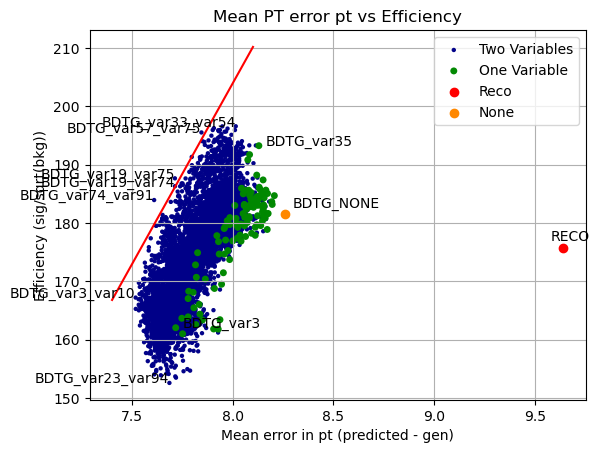

8.129314422607422 193.255950306513
One variable:	8.03412882197987	178.8889140805786
Two variables:	7.808921806567703	174.25596353556853


In [273]:
x = np.linspace(7.4, 8.1, 10)

def linfunc(x):
    return x*62 - 292

plt.scatter(twoVar_errors, twoVar_shape, color="#000088", s=10, label='Two Variables', alpha=0.99, edgecolor="none")
plt.scatter(oneVar_errors, oneVar_shape, color="#008800", s=25, label='One Variable', alpha=0.99, edgecolor="none")
plt.scatter(reco_errors, reco_shape, color="#ff0000", label='Reco')
plt.scatter(none_errors, none_shape, color="#ff8800", label='None')
plt.plot(x, linfunc(x), color="#ff0000")
for i, label in enumerate(reco_names):
    plt.annotate(label, (reco_errors[i], reco_shape[i]), textcoords="offset points", xytext=(5,5), ha='center')
for i, label in enumerate(none_names):
    plt.annotate(label, (none_errors[i], none_shape[i]), textcoords="offset points", xytext=(5,5), ha='left')
for i, label in enumerate(oneVar_names):
    if (oneVar_shape[i] > 192 or oneVar_errors[i] < 7.74):
        plt.annotate(label, (oneVar_errors[i], oneVar_shape[i]), textcoords="offset points", xytext=(5,0), ha='left')
for i, label in enumerate(twoVar_names):
    if (twoVar_shape[i] > 196.58 or twoVar_errors[i] < 7.517 or twoVar_shape[i] < 153):
        plt.annotate(label, (twoVar_errors[i], twoVar_shape[i]), textcoords="offset points", xytext=(0,0), ha='right')
    if (twoVar_shape[i] > linfunc(twoVar_errors[i])):
        plt.annotate(label, (twoVar_errors[i], twoVar_shape[i]), textcoords="offset points", xytext=(0,0), ha='right')

'''
for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
    if n.count("var21") > 0:
        plt.scatter(e, s, color="#ff0000", s=15, alpha=0.5)
    if n.count("var32") > 0:
        plt.scatter(e, s, color="#ffff00", s=15, alpha=0.5)'''


plt.xlabel('Mean error in pt (predicted - gen)')
plt.ylabel('Efficiency (sig/sqrt(bkg))')
plt.title('Mean PT error pt vs Efficiency')
plt.grid()
plt.legend()
plt.show()
print(arrs[1][arrs[0].index("BDTG_var35")], arrs[2][arrs[0].index("BDTG_var35")])
print("One variable:\t{}\t{}".format(np.mean(oneVar_errors), np.mean(oneVar_shape)))
print("Two variables:\t{}\t{}".format(np.mean(twoVar_errors), np.mean(twoVar_shape)))

In [277]:
nBest = 11

oneVar_errors_np = np.array(oneVar_errors)
oneVar_names_np = np.array(oneVar_names)
oneVar_shape_np = np.array(oneVar_shape)

lowest_errors_oneVar = np.argsort(oneVar_errors_np)[:nBest]
lowNames_oneVar = np.asarray([x.split("_")[1] for x in oneVar_names_np[lowest_errors_oneVar]])
print(lowNames_oneVar)

highest_shape_oneVar = np.argsort(oneVar_shape_np)[::-1][:nBest]
highNames_oneVar = np.asarray([x.split("_")[1] for x in oneVar_names_np[highest_shape_oneVar]])
print(highNames_oneVar)

combinedVars_oneVar = list(set(lowNames_oneVar).union(set(highNames_oneVar)))
print(len(combinedVars_oneVar))

nBest = 12

twoVar_errors_np = np.array(twoVar_errors)
twoVar_names_np = np.array(twoVar_names)
twoVar_shape_np = np.array(twoVar_shape)

lowest_errors_twoVar = np.argsort(twoVar_errors_np)[:nBest]
lowNames_twoVar = np.asarray([x.split("_")[1] for x in twoVar_names_np[lowest_errors_twoVar]] + [x.split("_")[2] for x in twoVar_names_np[lowest_errors_twoVar]])
print(lowNames_twoVar, len(set(lowNames_twoVar)))

highest_shape_twoVar = np.argsort(twoVar_shape_np)[::-1][:nBest]
highNames_twoVar = np.asarray([x.split("_")[1] for x in twoVar_names_np[highest_shape_twoVar]] + [x.split("_")[2] for x in twoVar_names_np[highest_shape_twoVar]])
print(highNames_twoVar, len(set(highNames_twoVar)))

diagNames = []
for n, e, s in zip(twoVar_names_np, twoVar_errors_np, twoVar_shape_np):
    if s > linfunc(e)-2:
        diagNames.append(n)
diagNames = np.asarray([x.split("_")[1] for x in diagNames] + [x.split("_")[2] for x in diagNames])

print(diagNames, len(set(diagNames)))

combinedVars_twoVar = list(set(lowNames_twoVar).union(set(highNames_twoVar)).union(set(diagNames)))
print(len(combinedVars_twoVar))

combinedVars_onetwoVar = sorted([int(x[3:]) for x in list(set(combinedVars_oneVar).union(set(combinedVars_twoVar)))])
print(len(combinedVars_onetwoVar))
print(combinedVars_onetwoVar)

['var3' 'var25' 'var16' 'var98' 'var31' 'var2' 'var12' 'var24' 'var91'
 'var37' 'var30']
['var35' 'var74' 'var85' 'var97' 'var44' 'var57' 'var75' 'var33' 'var89'
 'var73' 'var41']
22
['var3' 'var10' 'var3' 'var11' 'var10' 'var3' 'var14' 'var3' 'var3'
 'var24' 'var3' 'var24' 'var10' 'var24' 'var11' 'var24' 'var23' 'var74'
 'var24' 'var41' 'var14' 'var30' 'var75' 'var75'] 10
['var33' 'var13' 'var57' 'var74' 'var35' 'var13' 'var35' 'var57' 'var57'
 'var58' 'var33' 'var57' 'var54' 'var97' 'var74' 'var89' 'var57' 'var74'
 'var38' 'var85' 'var65' 'var85' 'var35' 'var75'] 13
['var0' 'var10' 'var11' 'var13' 'var15' 'var15' 'var19' 'var19' 'var19'
 'var19' 'var20' 'var22' 'var33' 'var34' 'var34' 'var35' 'var37' 'var41'
 'var41' 'var57' 'var57' 'var70' 'var74' 'var74' 'var75' 'var75' 'var85'
 'var33' 'var91' 'var56' 'var74' 'var35' 'var74' 'var35' 'var74' 'var75'
 'var85' 'var74' 'var75' 'var75' 'var74' 'var75' 'var91' 'var41' 'var57'
 'var91' 'var74' 'var75' 'var74' 'var109' 'var91' 'var109' 'v